## Project 1 - Programming for Data Analysis
Due: 4th of December 2022.

**Requirements:** _"For this project you must create a data set by simulating a real-world phenomenon of your choosing."_

**Background:** The aim of this report was to create a dataset assessing the change in cigarette use and if a link exists between usage and illness between 2019 and 2022 within Ireland.

1. Creating a data frame of unique respondents
     -  _Initial dataset_
     -  _Categorical variables_
     -  _Binary variables_
     -  _Numeric data_
5. Results
6. Discussion
7. References

**_Load Libraries_**

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%pip install seaborn

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.font_manager as font_manager

#### **Initial Dataset**

In [199]:
dataset = 1000
response_id = np.random.randint(1, 1000, dataset)
df = pd.DataFrame({"Response ID":response_id})

#### **Categorical Variables**

In [200]:
df['Residence'] = np.random.choice(["City","Town", "Rural"], size=dataset, p=[.37,.42,.21])
df['Year'] = np.random.choice([2018, 2019, 2020, 2021, 2022], size=dataset, p=[.2,.2,.2,.2,.2])
df['Frequency'] = np.random.randint(1,10 , dataset)
df['Age'] = np.random.randint(low=17, high=60, size=dataset)
df.head()

,Response ID,Residence,Year,Frequency,Age
0,24,City,2019,1,53
1,684,City,2020,7,34
2,92,Rural,2019,2,59
3,443,Town,2018,4,49
4,772,Town,2019,8,37


#### **Binary Varibles**

In [201]:
df['Gender'] = np.random.choice(["Male","Female"], size=dataset, p=[.517,.483])
df['Illness'] = np.random.choice(["Yes","No"], size=dataset)
df['Type'] = np.random.choice(["Tobacco","e-Cigarettes"], size=dataset, p=[.695,.305])
df.tail()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type
995,14,Town,2021,8,49,Male,Yes,e-Cigarettes
996,606,Town,2020,5,27,Male,Yes,e-Cigarettes
997,125,Rural,2018,9,48,Male,Yes,Tobacco
998,971,City,2020,9,59,Male,No,Tobacco
999,958,Town,2018,8,17,Male,No,e-Cigarettes


#### **Numeric Variables**

In [202]:
cost = []
for row in df['Frequency']:
        if row < 2 :    cost.append(float(np.random.uniform(10,20,1)))
        elif row < 4  : cost.append(float(np.random.uniform(21,40,1)))
        elif row < 6 : cost.append(float(np.random.uniform(41,60,1)))
        elif row < 8 :  cost.append(float(np.random.uniform(61,80,1)))        
        else:          cost.append(float(np.random.uniform(81,110,1)))

In [203]:
df['Cost'] = cost

In [204]:
df.loc[df['Frequency'] <= 5, 'Salary'] = df['Frequency']*df['Age']*100 
df.loc[df['Frequency'] > 5, 'Salary'] = df['Frequency']*df['Age']*100 + df['Cost']*15
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type,Cost,Salary
0,24,City,2019,1,53,Male,Yes,Tobacco,13.826003,5300.000000
1,684,City,2020,7,34,Male,No,e-Cigarettes,73.430447,24901.456707
2,92,Rural,2019,2,59,Male,No,Tobacco,29.010066,11800.000000
3,443,Town,2018,4,49,Female,Yes,Tobacco,54.519668,19600.000000
4,772,Town,2019,8,37,Female,Yes,e-Cigarettes,82.745359,30841.180391


In [205]:
df['Cost']= df['Cost'].apply(lambda x:round(x,2))
df['Salary']= df['Salary'].apply(lambda x:round(x,2))
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type,Cost,Salary
0,24,City,2019,1,53,Male,Yes,Tobacco,13.83,5300.00
1,684,City,2020,7,34,Male,No,e-Cigarettes,73.43,24901.46
2,92,Rural,2019,2,59,Male,No,Tobacco,29.01,11800.00
3,443,Town,2018,4,49,Female,Yes,Tobacco,54.52,19600.00
4,772,Town,2019,8,37,Female,Yes,e-Cigarettes,82.75,30841.18


In [206]:
df['Cost'] =np.float32(df['Cost'])
df['Salary'] = np.float32(df['Salary'])

In [207]:
print(df.dtypes)

Response ID      int32
Residence       object
Year             int32
Frequency        int32
Age              int32
Gender          object
Illness         object
Type            object
Cost           float32
Salary         float32
dtype: object


### **Results**

In [208]:
df.describe().T.apply(lambda x:round(x,2))

,count,mean,std,min,25%,50%,75%,max
Response ID,1000.0,504.78,289.84,1.00,253.75,511.0,775.00,998.00
Year,1000.0,2019.97,1.41,2018.00,2019.00,2020.0,2021.00,2022.00
Frequency,1000.0,4.98,2.57,1.00,3.00,5.0,7.00,9.00
Age,1000.0,38.16,12.29,17.00,28.00,38.0,49.00,59.00
Cost,1000.0,56.14,27.57,10.08,32.08,54.2,76.68,109.91
Salary,1000.0,19578.55,12546.42,1700.00,9400.00,17200.0,28000.00,54717.27


By default the describe method only shows statistics for the numeric variables. Using include = 'objects' computes the summary statistics for the string variables. 

In [209]:
df.describe(include='object')

,Residence,Gender,Illness,Type
count,1000,1000,1000,1000
unique,3,2,2,2
top,Town,Male,No,Tobacco
freq,421,529,503,702


In [210]:
df1= df.loc[:, ['Salary','Cost','Type', 'Illness']]
df1.groupby(['Type', 'Illness']).agg([np.mean, np.std]).apply(lambda x:round(x,2))

Salary                 Cost       
                              mean       std       mean    std
Type         Illness                                          
Tobacco      No       19639.189453  13035.94  55.990002  28.54
             Yes      20049.320312  12436.97  56.730000  26.96
e-Cigarettes No       18847.669922  11977.95  53.910000  27.68
             Yes      19065.859375  12237.38  57.340000  26.64

In [211]:
df2= df.loc[:, ['Salary','Cost','Type', 'Gender']]
df2.groupby(['Type', 'Gender']).agg([np.mean, np.std]).round(2)

Salary                 Cost       
                             mean       std       mean    std
Type         Gender                                          
Tobacco      Female  20014.000000  12854.56  56.160000  27.32
             Male    19694.660156  12646.46  56.529999  28.15
e-Cigarettes Female  18509.480469  11178.93  55.279999  26.07
             Male    19386.400391  12924.41  55.950001  28.27

In [212]:
font = font_manager.FontProperties(style='oblique', size=8) # To keep the ledger in the top right coner 

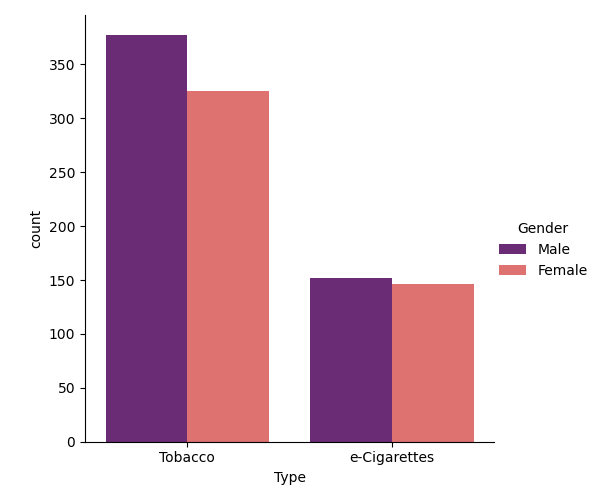

In [213]:
sns.catplot(x="Type", kind="count", hue = "Gender", palette='magma', data=df)
plt.show()

Here it shows the tobacco and e-cigarette analysis with respect to the gender.

There is less variance between genders for e-cigarette compared to tobacco users. 

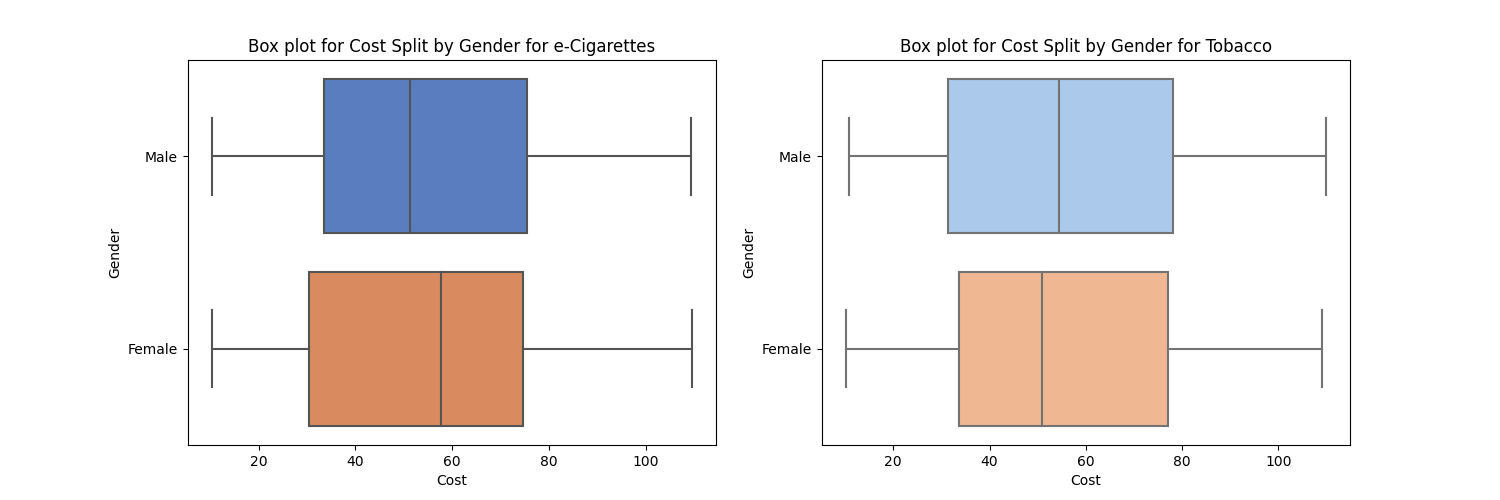

In [223]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.boxplot(y="Gender", x="Cost", data =  df[(df.Type == 'e-Cigarettes')], palette = 'muted')
plt.title("Box plot for Cost Split by Gender for e-Cigarettes")

plt.subplot(1, 2, 2) # index 2
sns.boxplot(y="Gender", x="Cost", data =  df[(df.Type == 'Tobacco')], palette = 'pastel')
plt.title("Box plot for Cost Split by Gender for Tobacco")
plt.show()

The above boxplot shows the distribution of cost between cigarette types, split by gender. 

The medians (which generally will be close to the average) are not at the same level for both genders. For females, the distribution is slightly different, a higher medium cost is associated with e-cigarettes compared to males, the cost data is more dispersed for females.

For tobacco users the distribution for both genders is positively skewed. This condition occurs because probabilities taper off more slowly when the cost is higher. Consequently, extreme values can be found far from the peak on the high end more frequently than on the low.

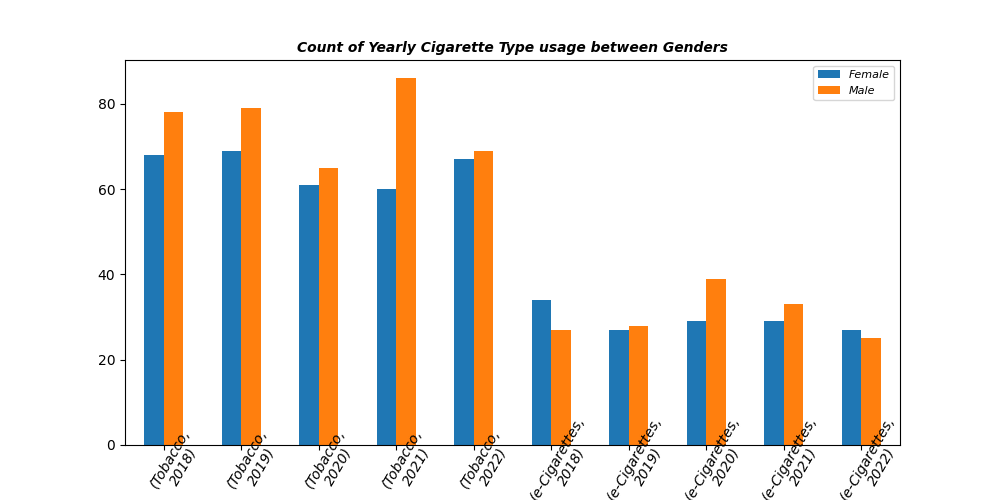

In [224]:
df.groupby(['Type','Year', 'Gender']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 5), legend=True, fontsize=10)
plt.xticks(fontsize=10, style='oblique', ha='center',
         va='top', wrap=True, rotation = 60)
plt.title("Count of Yearly Cigarette Type usage between Genders",fontsize=10, style='oblique', weight='bold')
plt.legend(loc=1, prop = font)
plt.show()

The use of either e-cigarette or tobacco-based cigarettes among Irish citizens between 2018 and 2022. The usage of tobacco-based cigarettes is higher among males in recent years while e-cigarettes usage represents a small cohort of respondents, females tend to have a high usage. It's interesting to note that a decrease in usage occurred between 2020 and 2021, which may have been triggered by Covid-19.

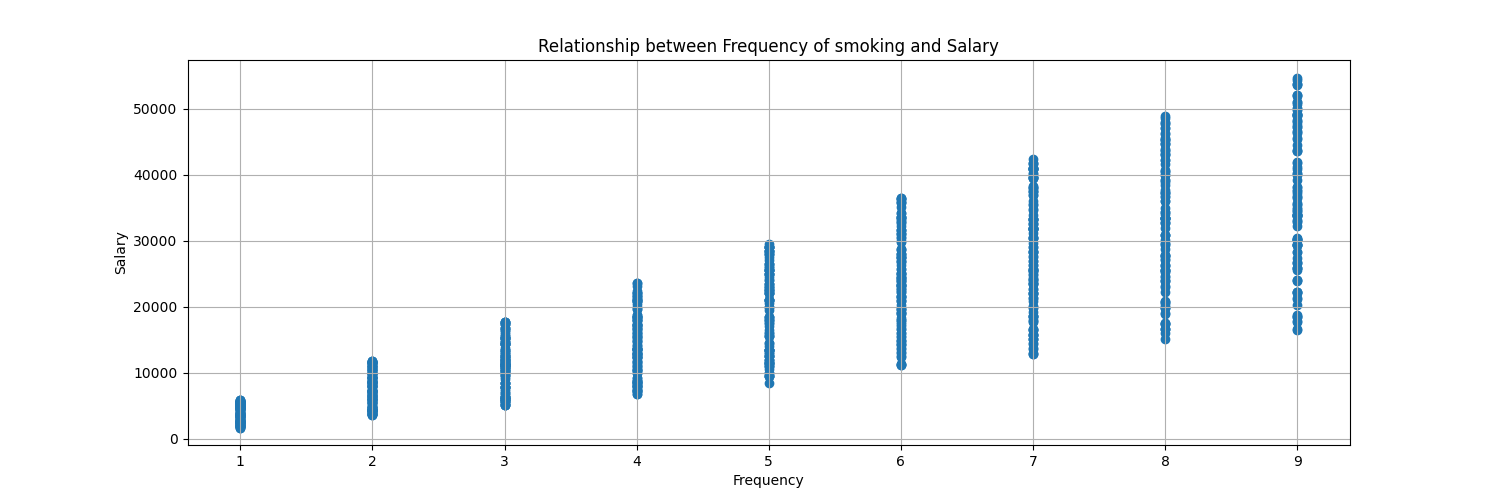

In [225]:
plt.subplots(figsize=(15,5))
plt.scatter(df['Frequency'],df['Salary'])
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.title('Relationship between Frequency of smoking and Salary')
plt.grid()
plt.show()

The above graph shows that frequency of usage increases with salary. This is an expected outcome, considering that smoking is an expensive habit, and a higher disposable income is needed to finance the habit.

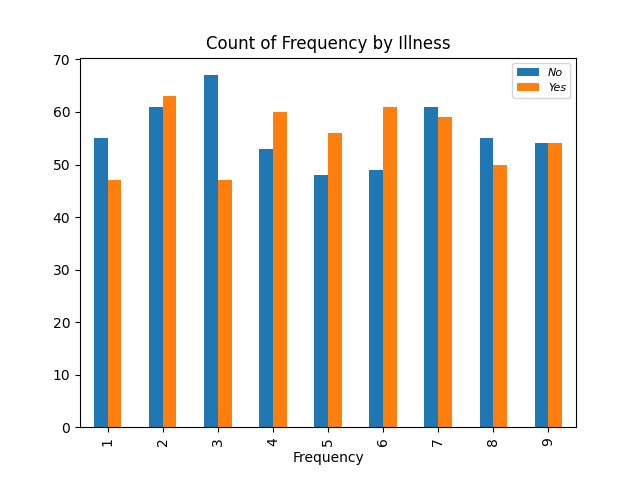

In [226]:
plt.subplots(figsize=(15,5))
df.groupby(['Frequency', 'Illness']).size().unstack().plot(kind='bar', stacked=False)
plt.title("Count of Frequency by Illness")
plt.legend(loc=1, prop = font)
plt.show()

The above chart looks at determining if the frequency of smoking decreses when a respondent has a known illness. Do people smoke more frequently when they are not at risk of illness? 

The below charts are split into four subplots with linear lines across the plot showing best available fit for the trend of the cost of smoking with respect to a respondent’s salary. And the data points that we see at extreme top right which are far away from this line are known as outliers in the dataset. The bottom left of the chart shows datapoints more clustered together. There is a higher number of respondents with an underlying health problem who smoke tobacco cigarettes compared to those smoking e-cigarettes. 

By adding hue = gender, we can split the charts even further.

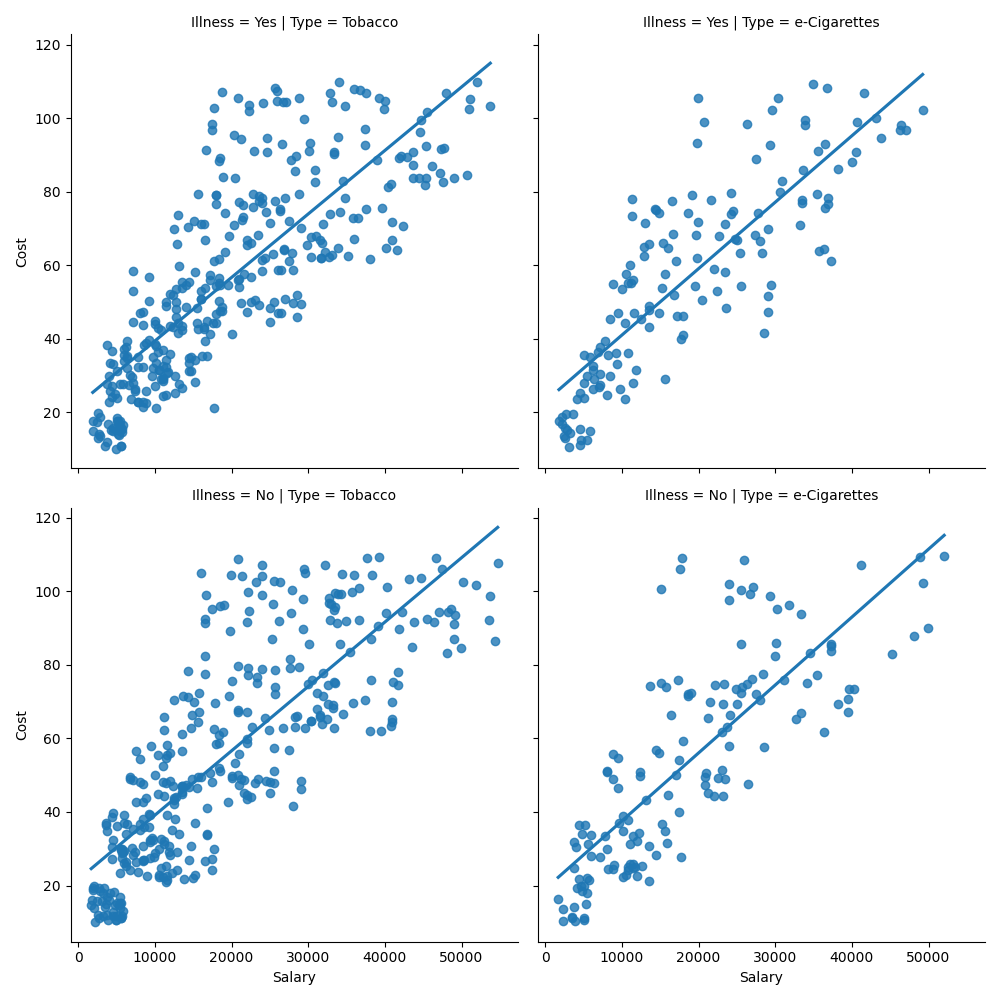

In [227]:
sns.lmplot(x="Salary", y="Cost", col="Type", row="Illness",ci=False,data= df, height=5, aspect =1)
plt.show()

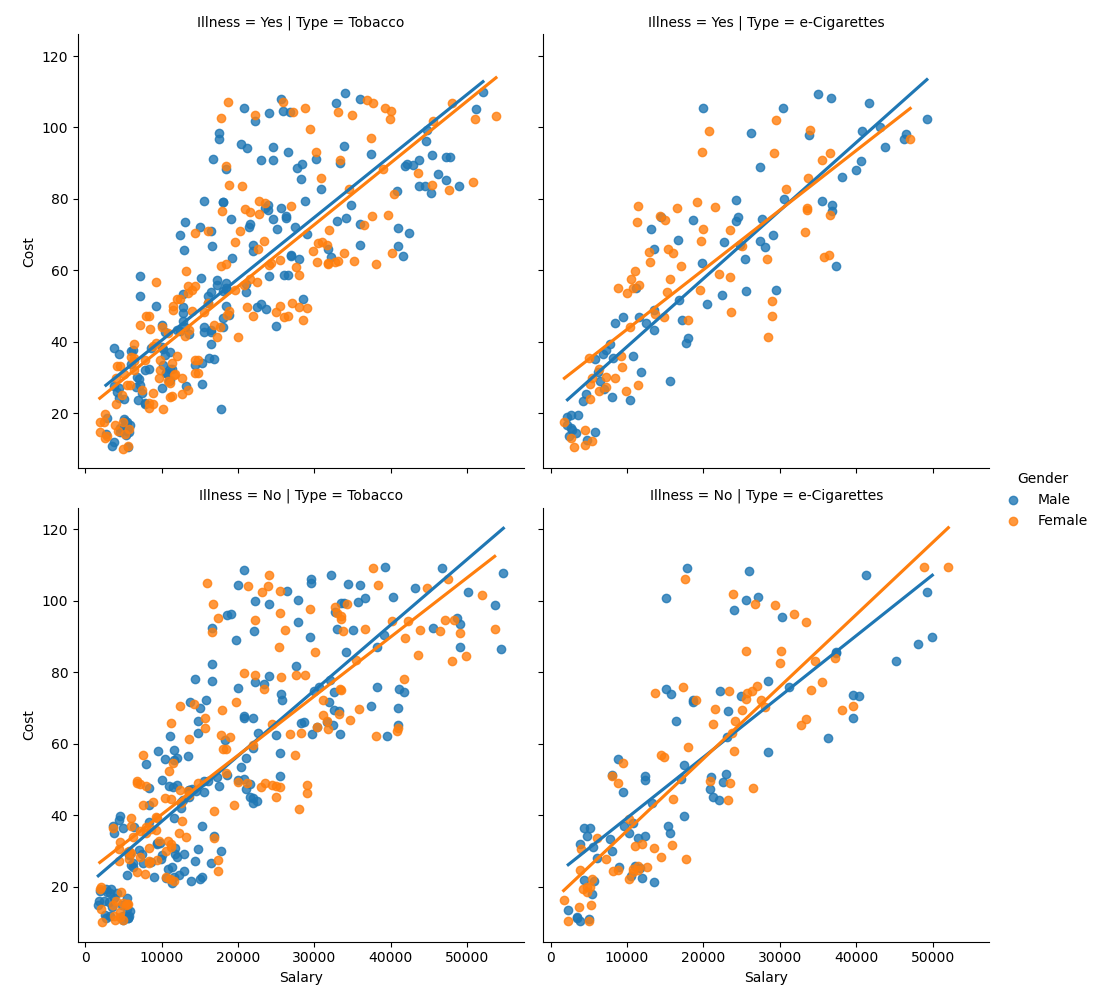

In [228]:
sns.lmplot(x="Salary", y="Cost", col="Type", row="Illness",hue= "Gender", ci=False,data= df, height=5, aspect =1)
plt.show()

From the above chart, there is a higher number of males who smoke e-cigarettes while earning a lower salary compared to females. Males with an underlying illness also tend to spend more on both types of cigarettes. 

Using histograms to determine the distribution of age across respondents, we can see that the highest cohort exist under the age of 21 for females and those who smoke at a frequency of less than 5. The histogram data is split further by splitting the columns by type of smoker. The variable Age doesn't follow a normal distribution, but this is not surprising since the column was generated at random.

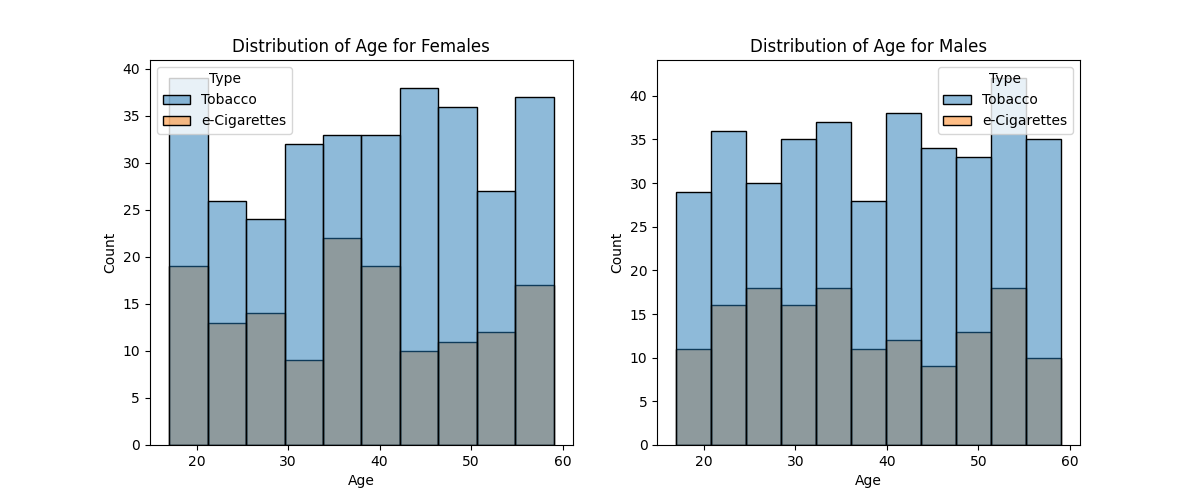

In [231]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.histplot(x= "Age", data =  df[(df.Gender == 'Female')], hue = "Type")
plt.title("Distribution of Age for Females")

plt.subplot(1, 2, 2) # index 2
ax = sns.histplot(x= "Age", data =  df[(df.Gender == 'Male')], hue = "Type")
plt.title("Distribution of Age for Males")
plt.show()

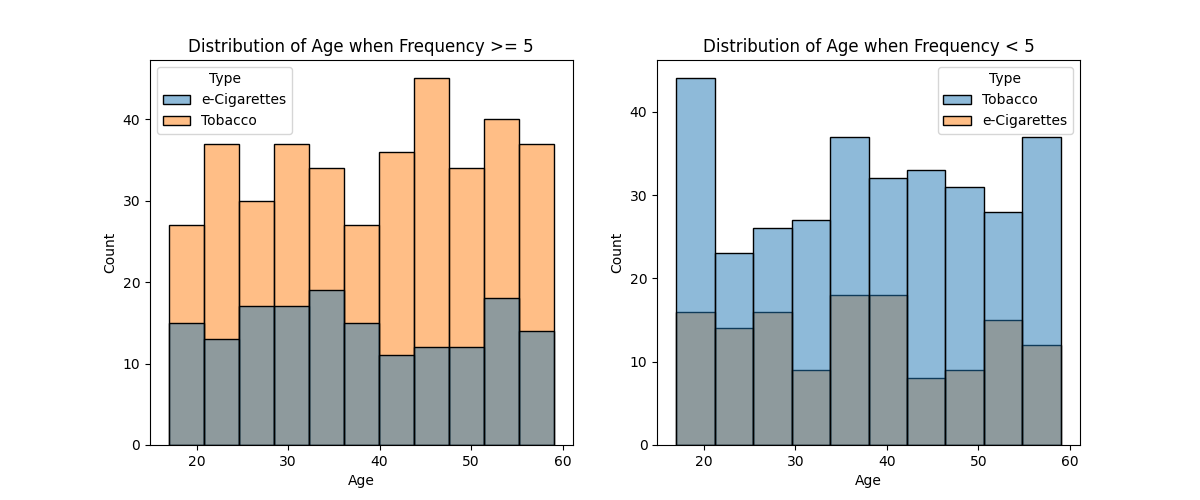

In [232]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.histplot(x= "Age", data =  df[(df.Frequency >= 5)],hue= "Type")
plt.title("Distribution of Age when Frequency >= 5")

plt.subplot(1, 2, 2) # index 2
ax = sns.histplot(x= "Age", data =  df[(df.Frequency < 5)],hue= "Type")
plt.title("Distribution of Age when Frequency < 5")
plt.show()

To determine if there is a correlation between variables, a heatmap was used. 

A high correlation between is represented by 1.0 and a low is close to 0.0. Variables cost and salary were generated based on assumptions to frequency and age, therefore a correlation exists between these variables. Since the other variables were generated at random, a lower correlation exists. 

The correlation plot only includes variables that are numeric, LabelEncoder() package was used to assign numeric values to the string variables. The numeric value was assigned based on alphabetical order i.e Female, Male = 0,1

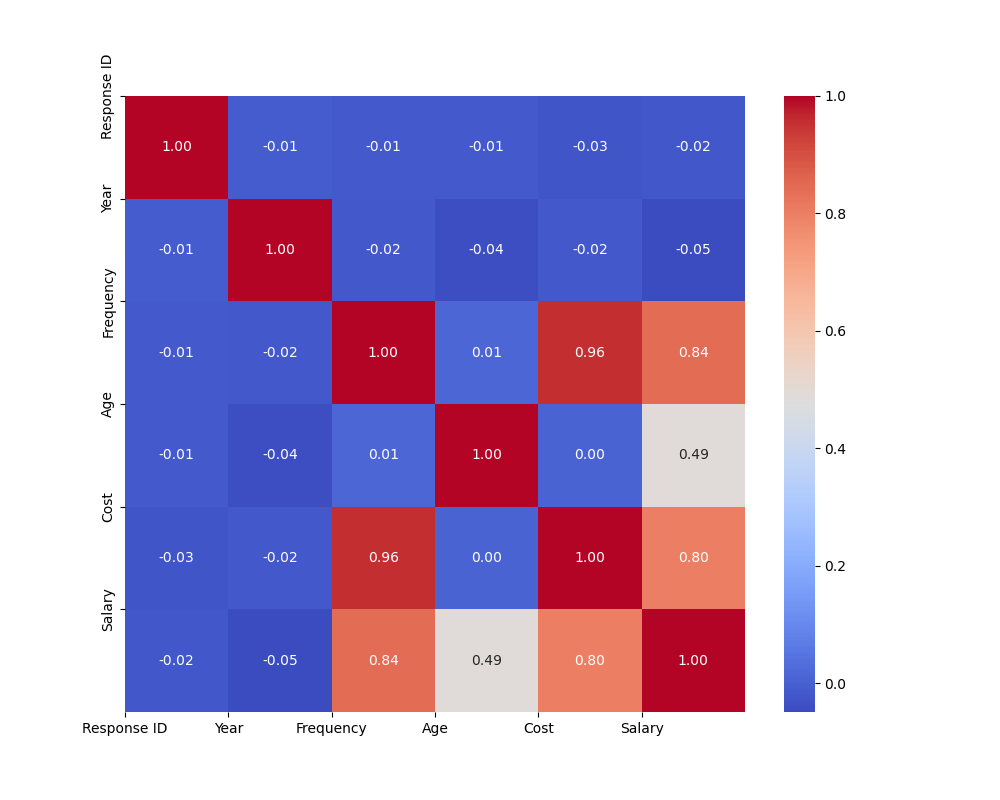

In [233]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [236]:
#### Changes variables to numeric value to determine correlation with cost, based on alphabetical order
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.Gender) 
df.Gender = le.transform(df.Gender)
# smoker or not
le.fit(df.Type) 
df.Type = le.transform(df.Type)
#region
le.fit(df.Residence) 
df.Residence = le.transform(df.Residence)
#Illness
le.fit(df.Illness) 
df.Illness = le.transform(df.Illness)

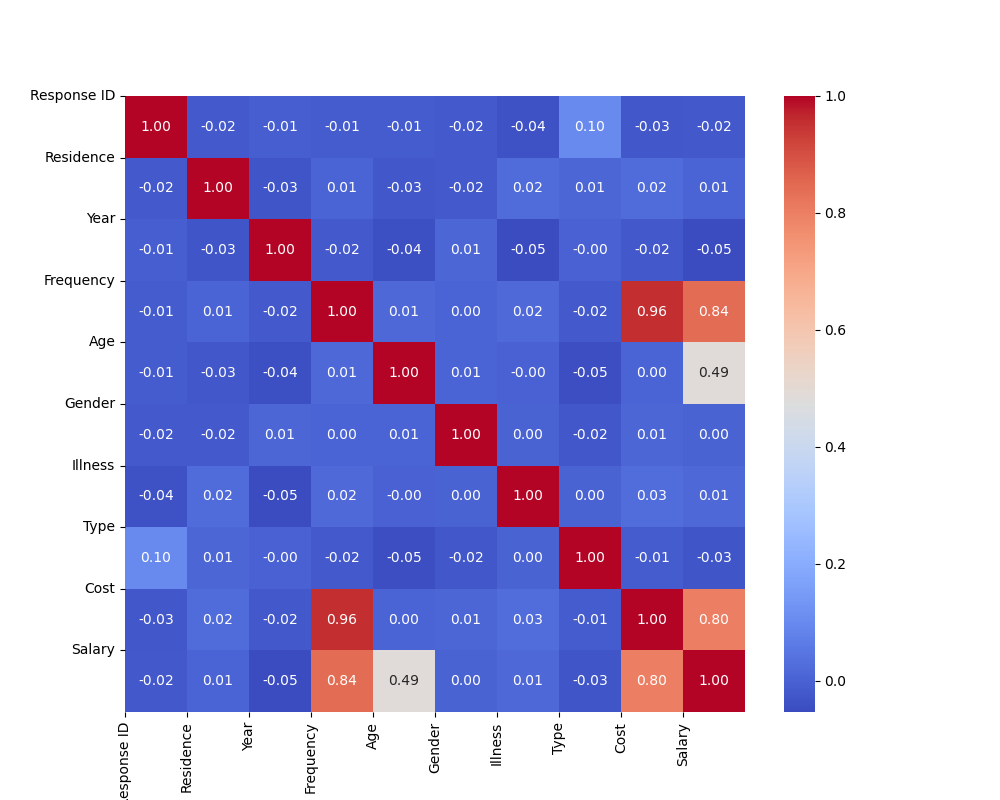

In [237]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### **Discussion**

The aim of this study was to create a dataset based on variables associated with smoking. I used two methods to create variables for this report, variables created at random and variables created based on other variables. The variables that were created using the random package where split based on finding in studies carried out in Ireland and the EU. These splits were based on a higher percentage of males than females with tobacco-based cigarettes used more than e-cigarettes. Numeric variables such as cost, and salary were generated based on frequency and age. Visual aids were used to show the relationship between gender and smoking types, where males and tobacco-based cigarettes were the more dominate results. Cost and Salary variables increased with frequency and age based on an assumption that the more frequently a person smokes, increase in spending which means a higher salary to afford the habit. The correlation chart shows the difference in relationships between variables created at random, a low correlation and those based off other variables creating a high correlation.

### **References**
1. https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-021-12113-9
2. https://smokinginengland.info/graphs/e-cigarettes-latest-trends
3. https://tobaccocontrol.bmj.com/content/26/1/98
4. https://www.cdc.gov/tobacco/basic_information/e-cigarettes/about-e-cigarettes.html
5. https://www.drugsandalcohol.ie/35121/
6. https://www.drugsandalcohol.ie/24024/
7. https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
8. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
9. https://practicaldatascience.co.uk/machine-learning/how-to-create-synthetic-data-sets-for-machine-learning
